In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../../precleaned-datasets/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
columns = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']
data = data[columns]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Survived']),
                                                     data['Survived'],
                                                       test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 5) (179, 5) (712,) (179,)


In [6]:
crosstab = pd.crosstab(X_train['Pclass'], y_train, margins=True)
crosstab

Survived,0,1,All
Pclass,,,
1,64,99,163
2,78,73,151
3,302,96,398
All,444,268,712


In [7]:
chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=np.float64(75.40595805614944), pvalue=np.float64(3.166306009643658e-14), dof=6, expected_freq=array([[101.64606742,  61.35393258, 163.        ],
       [ 94.16292135,  56.83707865, 151.        ],
       [248.19101124, 149.80898876, 398.        ],
       [444.        , 268.        , 712.        ]]))

In [8]:
chi_ls = []

for feature in X_train.columns:
    
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

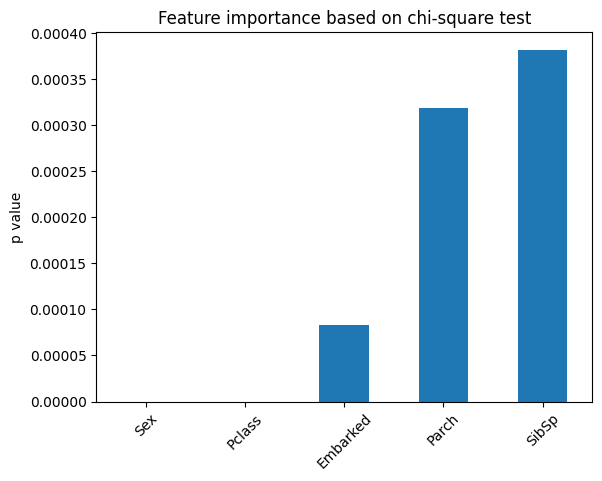

In [9]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [10]:
selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['Sex', 'Pclass', 'Embarked'], dtype='object')

In [11]:
X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,Sex,Pclass,Embarked
331,male,1,S
733,male,2,S
382,male,3,S
704,male,3,S
813,female,3,S
